In [23]:
#This program generates the FIG.3A and Fig.3B 
#Fig3A: Raster plot of all the populations in the input condition.
#Fig3B: Firing rates traces

In [24]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [25]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [26]:
a="simulations_data/Sp_input"  #Folder where the spikes files and the spike counts are contained
b="simulations_data/Rt_input"  #Folder where the rates files and the spike counts are contained

In [27]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

In [28]:
#Raster plot of the cortical column

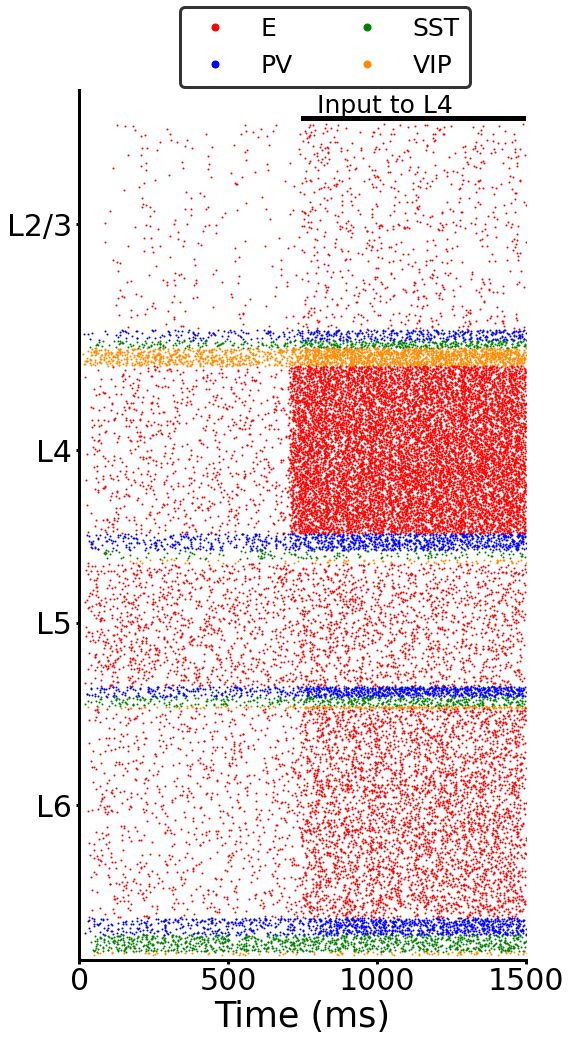

In [29]:
Ntot=5000 #total number of neurons (rows) in the plot
#Need this for the raster plot
N1=int(0.0192574218*Ntot) 
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5


#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i

#create the figure
#fig, ax = plt.subplots(figsize =(7, 17)) #Tight
fig, ax = plt.subplots(figsize =(8, 16)) 
#fig, ax = plt.subplots(figsize =(10, 16)) #Large

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

plt.ylim(-30,5205)
plt.xlim(0,1500)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#Ticks size and lables
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #How many ticks on x axis
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)', size=35)
#plt.ylabel('neuron index', size=30)

#Create names of layers on the y-axis
lab = ('L6', 'L5',
               'L4', 'L2/3')
y_pos = [900,2000,3040,4400] #position where to put the labels
plt.yticks(y_pos, lab,size=28)
plt.yticks(size=30)

# Add text
plt.text(800,5070,'Input to L4',rotation=360,size=25)
plt.axhline(5035, xmin =0.5, xmax =1,color='k', linewidth=5)


#Legend with taylored sizes
l1= plt.legend(loc='upper center', bbox_to_anchor=(0.55, 1.11),
          ncol=2, fancybox=True, markerscale=7, shadow=False, fontsize=25)
l1.get_frame().set_linewidth(3.0)
l1.get_frame().set_edgecolor('k')

#Save fig
plt.savefig('IMAGES/Fig3A_raster_input_e4.png')

#SHow the plot
plt.show()

In [30]:
#Upload the rate files
R_vip1rate=np.array(np.loadtxt(b+'/R_vip1rate.txt') )

#layer23
R_e23rate=np.array(np.loadtxt(b+'/R_e23rate.txt') )
R_pv23rate=np.array(np.loadtxt(b+'/R_pv23rate.txt') )
R_sst23rate=np.array(np.loadtxt(b+'/R_sst23rate.txt') )
R_vip23rate=np.array(np.loadtxt(b+'/R_vip23rate.txt') )

#layer4
R_e4rate=np.array(np.loadtxt(b+'/R_e4rate.txt') )
R_pv4rate=np.array(np.loadtxt(b+'/R_pv4rate.txt') )
R_sst4rate=np.array(np.loadtxt(b+'/R_sst4rate.txt') )
R_vip4rate=np.array(np.loadtxt(b+'/R_vip4rate.txt') )

#layer5
R_e5rate=np.array(np.loadtxt(b+'/R_e5rate.txt') )
R_pv5rate=np.array(np.loadtxt(b+'/R_pv5rate.txt') )
R_sst5rate=np.array(np.loadtxt(b+'/R_sst5rate.txt') )
R_vip5rate=np.array(np.loadtxt(b+'/R_vip5rate.txt') )

#layer6
R_e6rate=np.array(np.loadtxt(b+'/R_e6rate.txt') )
R_pv6rate=np.array(np.loadtxt(b+'/R_pv6rate.txt') )
R_sst6rate=np.array(np.loadtxt(b+'/R_sst6rate.txt') )
R_vip6rate=np.array(np.loadtxt(b+'/R_vip6rate.txt') ) 

In [31]:
#I am using Rates from Brian which are already taking into account the number of neuorons (division already done)

In [32]:
#Fucntion to compute the average firing rate from the spikes files with a sliding window
def rates(data,window,step_size):
    rates=[]
    spikes=0
    time=0
    all_time=len(data)
    while time <= all_time-window:

        for i in range(time,window+time):
            #print(i)
            spikes+=data[i]

        rates.append(spikes/window)
        #rates.append(spikes/(window*10**-4)) #If I use the array of spikes/timestep
        time+=step_size
        #print(step)
        spikes=0
    return rates

In [33]:
#Call the function to compute all the firing rates (will take some minutes to run)
#Is commented because I already saved in folders, I upload the files below
#If you want to recompute uncomment the following

# window=2000
# step=1
# r_vip1= rates(R_vip1rate,window,step)

# r_e23=rates(R_e23rate,window,step)
# r_pv23=rates(R_pv23rate,window,step)
# r_sst23=rates(R_sst23rate,window,step)
# r_vip23=rates(R_vip23rate,window,step)

# r_e4=rates(R_e4rate,window,step)
# r_pv4=rates(R_pv4rate,window,step)
# r_sst4=rates(R_sst4rate,window,step)
# r_vip4=rates(R_vip4rate,window,step)

# r_e5=rates(R_e5rate,window,step)
# r_pv5=rates(R_pv5rate,window,step)
# r_sst5=rates(R_sst5rate,window,step)
# r_vip5=rates(R_vip5rate,window,step)

# r_e6=rates(R_e6rate,window,step)
# r_pv6=rates(R_pv6rate,window,step)
# r_sst6=rates(R_sst6rate,window,step)
# r_vip6=rates(R_vip6rate,window,step)

# #I save the data in a folder
# save_folder='rate_200_1_plot'
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e23', r_e23)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e4', r_e4)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e5', r_e5)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e6', r_e6)

# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_pv23', r_pv23)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_pv4', r_pv4)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_pv5', r_pv5)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_pv6', r_pv6)

# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_sst23', r_sst23)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_sst4', r_sst4)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_sst5', r_sst5)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_sst6', r_sst6)

# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_vip23', r_vip23)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_vip4', r_vip4)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_vip5', r_vip5)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_vip6', r_vip6)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_vip1', r_vip1)

In [34]:
#I upload the saved files 
saved_folder='rate_200_1_plot'

r_e23=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e23.npy')
r_e4=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e4.npy')
r_e5=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e5.npy')
r_e6=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e6.npy')

r_pv23=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_pv23.npy')
r_pv4=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_pv4.npy')
r_pv5=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_pv5.npy')
r_pv6=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_pv6.npy')

r_sst23=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_sst23.npy')
r_sst4=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_sst4.npy')
r_sst5=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_sst5.npy')
r_sst6=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_sst6.npy')

r_vip23=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_vip23.npy')
r_vip4=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_vip4.npy')
r_vip5=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_vip5.npy')
r_vip6=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_vip6.npy')

28001


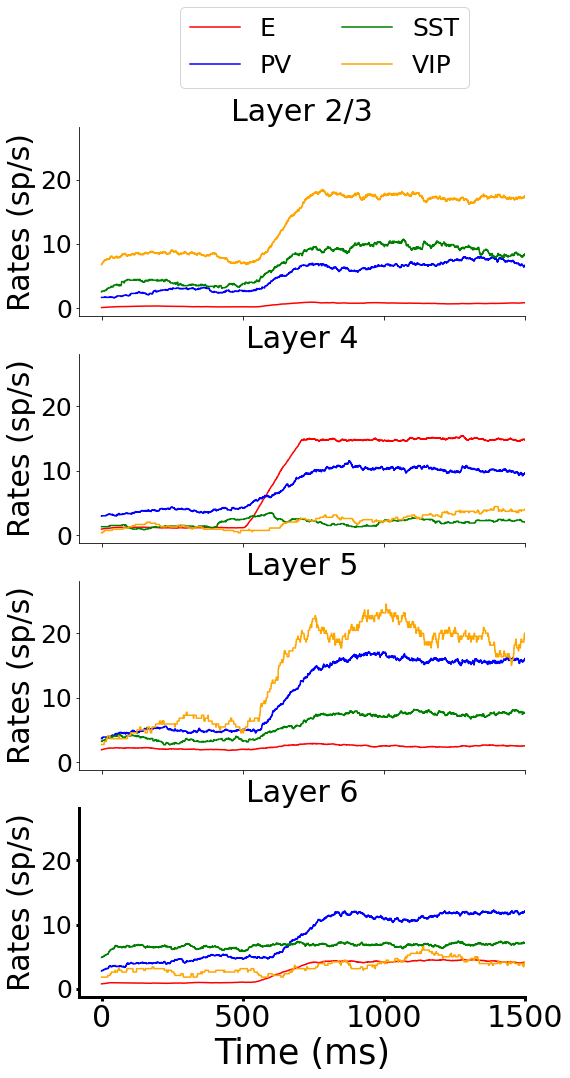

In [35]:
#x-axis values
time=[i for i in range(0,len(r_pv5))]
print(len(time))

#Create the fig 
f, axs = plt.subplots(4,sharex=True, sharey=True,figsize=(8,16))

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')

axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')

axs[2].spines['right'].set_color('none')
axs[2].spines['top'].set_color('none')

axs[3].spines['right'].set_color('none')
axs[3].spines['top'].set_color('none')
axs[3].xaxis.set_tick_params(width=3)
axs[3].yaxis.set_tick_params(width=3)
plt.setp(axs[3].spines.values(), linewidth=3)
plt.locator_params(axis='y', nbins=4)

#Plot values
#Layer 2/3
axs[0].plot(time, r_e23,color='r', label='E')
axs[0].plot(time, r_pv23,color='b', label='PV')
axs[0].plot(time, r_sst23,color='g', label='SST')
axs[0].plot(time, r_vip23,color='orange', label='VIP')
#axs[0].legend(loc="upper left",fontsize=12)

#layer 4
axs[1].plot(time, r_e4,color='r', label='e')
axs[1].plot(time, r_pv4,color='b', label='pv')
axs[1].plot(time, r_sst4,color='g', label='sst')
axs[1].plot(time, r_vip4,color='orange', label='vip')
axs[1].set_title('Layer 4',size=30)
#axs[1].set_xlabel('time (ms)',size=13)
axs[1].set_ylabel('Rates (sp/s)',size=30)
axs[1].tick_params(axis='both', which='major', labelsize=25)

#layer 5
axs[2].plot(time, r_e5,color='r', label='e')
axs[2].plot(time, r_pv5,color='b', label='pv')
axs[2].plot(time, r_sst5,color='g', label='sst')
axs[2].plot(time, r_vip5,color='orange', label='vip')
axs[2].set_title('Layer 5',size=30)
#axs[2].set_xlabel('time (ms)',size=13)
axs[2].set_ylabel('Rates (sp/s)',size=30)
axs[2].tick_params(axis='both', which='major', labelsize=25)

#layer 6
axs[3].plot(time, r_e6,color='r', label='e')
axs[3].plot(time, r_pv6,color='b', label='pv')
axs[3].plot(time, r_sst6,color='g', label='sst')
axs[3].plot(time, r_vip6,color='orange', label='vip')
axs[3].xaxis.set_ticks(np.arange(0, 30000, 5000)) # Ticks are placed at positions 0 to 8000 but the values displayed are from 0 to 800
axs[3].xaxis.set_ticklabels(np.arange(0, 3000, 500))
axs[3].set_title('Layer 6' ,size=30)
axs[3].set_xlim(-800,15000)  #TO FOCUS ON ONLY ONE PART
#Label
axs[3].set_xlabel('Time (ms)',size=35)
axs[3].set_ylabel('Rates (sp/s)',size=30)
#axs[3].legend(loc="upper left")
axs[3].tick_params(axis='both', which='major', labelsize=25)
axs[3].tick_params(axis='x', which='major', labelsize=30)

#Legend on the top
axs[0].legend(loc='upper center', bbox_to_anchor=(0.55, 1.7),
          ncol=2, fancybox=True, markerscale=10, shadow=False, fontsize=25)
#axs[0].legend(loc="upper left")
axs[0].set_ylabel('Rates (sp/s)',size=30)
axs[0].set_title('Layer 2/3',size=30)
axs[0].tick_params(axis='both', which='major', labelsize=25)

#Save fig
plt.savefig('IMAGES/Fig3B_rates_input.png')

#Show fig
plt.show()